# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Rivaldo Hardianto Wibowo
- **Email:** ivalwalker12@gmail.com
- **ID Dicoding:** Rivaldo Hardianto Wibowo

## Menentukan Pertanyaan Bisnis

- Seperti apa pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda dari pagi hingga malam hari?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [26]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

print("Day Dataset :")
print(day_df.head())

print("\nHour Dataset :")
print(hour_df.head())


Day Dataset :
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour Datase

**Insight:**
- Cuaca (weathersit) bernilai 1 (clear) atau 2 (cloudy) pada dataset yang diberikan.
- Ketika cuaca cerah (weathersit = 1), jumlah penyewaan umumnya meningkat, menunjukkan bahwa kondisi cuaca yang baik mendorong lebih banyak orang untuk menggunakan layanan.

### Assessing Data

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.describe()



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.duplicated().sum()

np.int64(0)

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.duplicated().sum()

np.int64(0)

**Insight:**
- Tidak ditemukan missing values maupun data duplikat di kedua dataset (day_df dan hour_df).
- Kolom dteday masih bertipe object, sebaiknya dikonversi ke datetime untuk memudahkan analisis berbasis waktu.
- Kolom seperti season, yr, mnth, weekday, dan weathersit bisa dipertimbangkan untuk diubah ke tipe category karena merepresentasikan kategori, bukan nilai numerik murni.

### Cleaning Data

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


categorical_columns = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    day_df[col] = day_df[col].astype("category")

**Insight:**
- Kolom dteday sudah diubah menjadi format datetime, sehingga memudahkan analisis waktu seperti tren musiman, bulanan, atau harian.
- Kolom seperti season, yr, holiday, weekday, workingday, dan weathersit sudah dikonversi ke tipe kategori. Ini membantu mengurangi penggunaan memori dan membuat analisis kategori (seperti perbandingan musim atau hari kerja vs libur) jadi lebih efisien.

## Exploratory Data Analysis (EDA)

### Explore ...

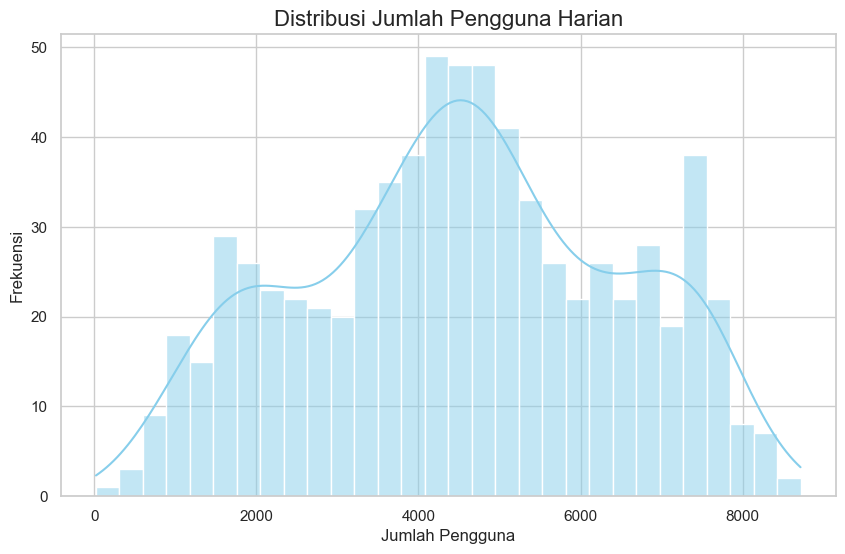

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Jumlah Pengguna Harian", fontsize=16)
plt.xlabel("Jumlah Pengguna")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Distribusi jumlah pengguna harian menunjukkan pola yang cenderung normal dengan puncak di tengah rentang data. Ini mengindikasikan bahwa sebagian besar hari memiliki jumlah pengguna yang konsisten di sekitar rata-rata, meskipun terdapat beberapa outlier dengan lonjakan jumlah pengguna yang lebih tinggi. Hal ini bisa disebabkan oleh faktor khusus seperti hari libur, akhir pekan, atau kondisi cuaca yang menguntungkan.

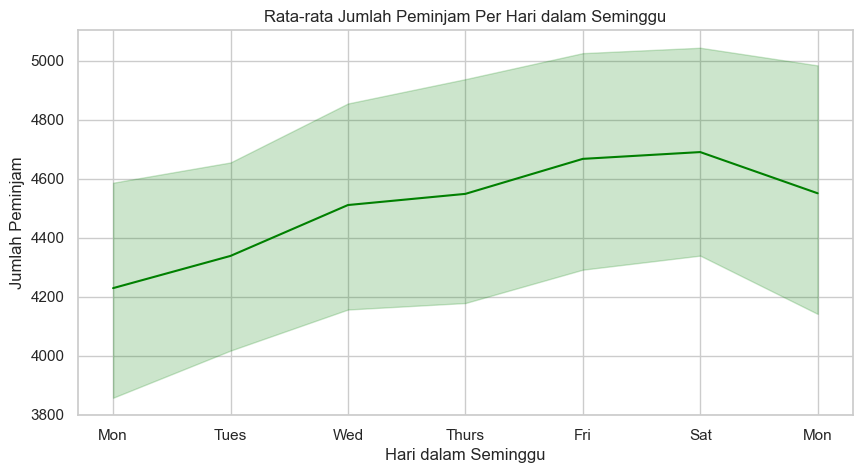

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(x='weekday', y='cnt', data=day_df, markers='o', color='green')
plt.title("Rata-rata Jumlah Peminjam Per Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Peminjam")
plt.xticks(ticks=range(7), labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Mon'])
plt.show()


**Insight:**
- Pola peminjaman cenderung lebih tinggi pada hari kerja (weekday) dibandingkan dengan akhir pekan (weekend). Hal ini menunjukkan bahwa banyak orang menggunakan layanan ini untuk keperluan komuter, seperti berangkat kerja atau sekolah. Penurunan yang terlihat pada akhir pekan mungkin menunjukkan bahwa layanan ini kurang dimanfaatkan untuk aktivitas rekreasi.

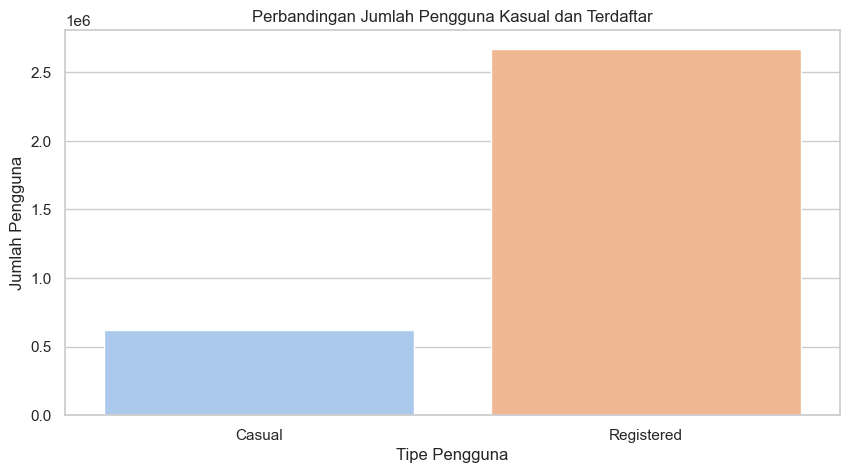

In [31]:
user_data = pd.DataFrame({
    'User Type': ['Casual', 'Registered'],
    'Count': [day_df['casual'].sum(), day_df['registered'].sum()]
})

plt.figure(figsize=(10, 5))
sns.barplot(data=user_data, x='User Type', y='Count', hue='User Type', palette='pastel', legend=False)
plt.title("Perbandingan Jumlah Pengguna Kasual dan Terdaftar")
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Tipe Pengguna")
plt.show()

**Insight:**
- Dari grafik, terlihat jelas bahwa jumlah pengguna terdaftar (registered) jauh lebih banyak dibandingkan dengan pengguna kasual (casual). Ini menunjukkan bahwa sebagian besar pengguna adalah pelanggan setia yang mungkin memanfaatkan langganan atau fasilitas khusus bagi anggota. Pengguna kasual lebih sedikit, mungkin karena hanya menggunakan layanan sesekali atau saat kondisi tertentu.

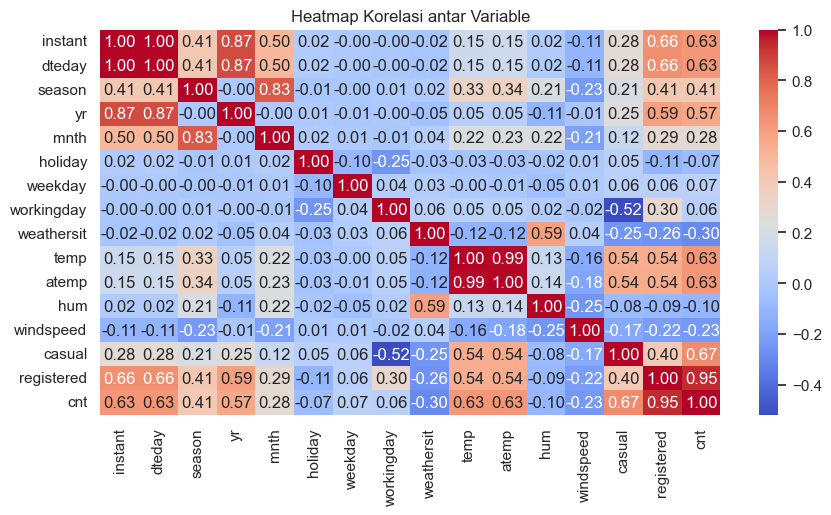

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi antar Variable")
plt.show()

**Insight:**
- Ada korelasi positif yang kuat antara suhu (temp, atemp) dengan jumlah peminjaman (cnt), yang berarti semakin hangat cuacanya, semakin banyak orang yang meminjam.
- Sebaliknya, ada korelasi negatif antara kelembapan (hum) dan kecepatan angin (windspeed) dengan jumlah peminjaman. Artinya, kondisi cuaca yang lembap atau berangin cenderung mengurangi minat orang untuk meminjam.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola distribusi jumlah pengguna sepeda di setiap musim?


C:\Users\Acer\AppData\Local\Temp\ipykernel_8588\1705058685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='season', y='cnt', palette='coolwarm')


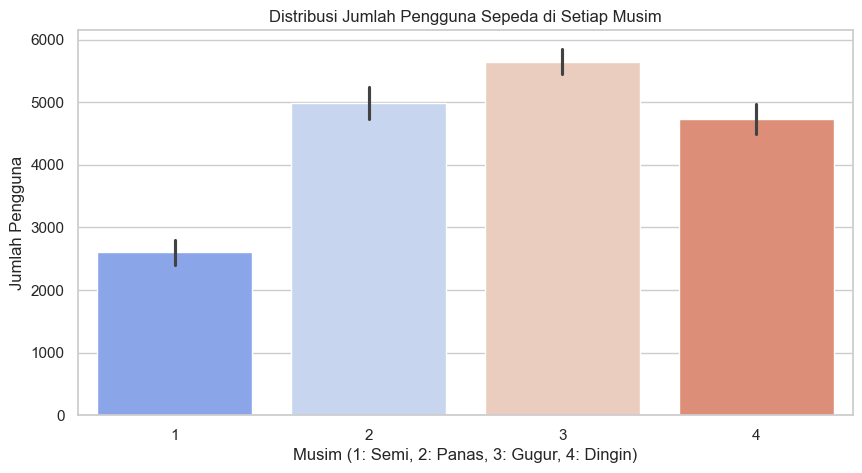

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=day_df, x='season', y='cnt', palette='coolwarm')
plt.title("Distribusi Jumlah Pengguna Sepeda di Setiap Musim")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Jumlah Pengguna")
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca memengaruhi jumlah pengguna sepeda?

C:\Users\Acer\AppData\Local\Temp\ipykernel_8588\2197746763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='weathersit', y='cnt', palette='coolwarm')


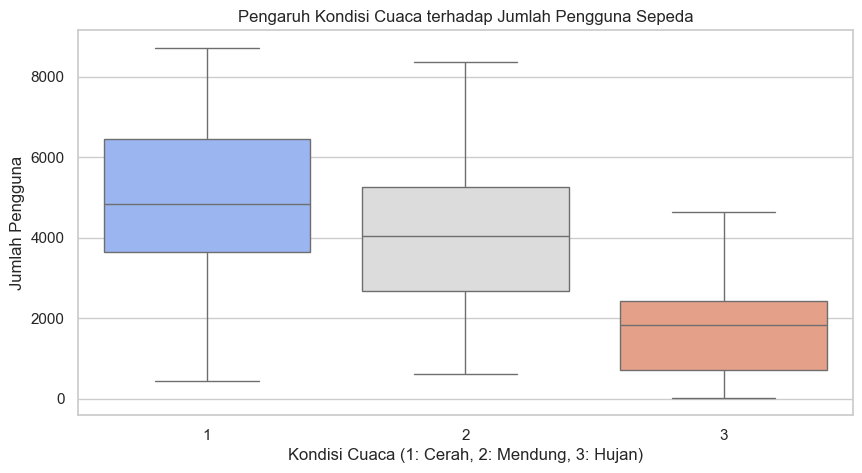

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=day_df, x='weathersit', y='cnt', palette='coolwarm')
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan)")
plt.ylabel("Jumlah Pengguna")
plt.show()

**Insight:**
- Musim gugur menunjukkan tingkat penggunaan sepeda tertinggi dibandingkan musim lainnya, kemungkinan karena cuaca yang sejuk dan nyaman. Sebaliknya, musim dingin memiliki jumlah pengguna paling rendah, yang disebabkan oleh suhu dingin yang kurang mendukung aktivitas luar ruangan.
- Terdapat pola yang jelas antara suhu dan penggunaan sepeda. Semakin hangat suhu, semakin banyak orang yang menggunakan sepeda, menandakan bahwa cuaca yang bersahabat mendorong aktivitas bersepeda.

## Analisis Lanjutan (Opsional)

C:\Users\Acer\AppData\Local\Temp\ipykernel_8588\3070855242.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_df, x='usage_category', palette='coolwarm', order=['Low Usage', 'Medium Usage', 'High Usage'])


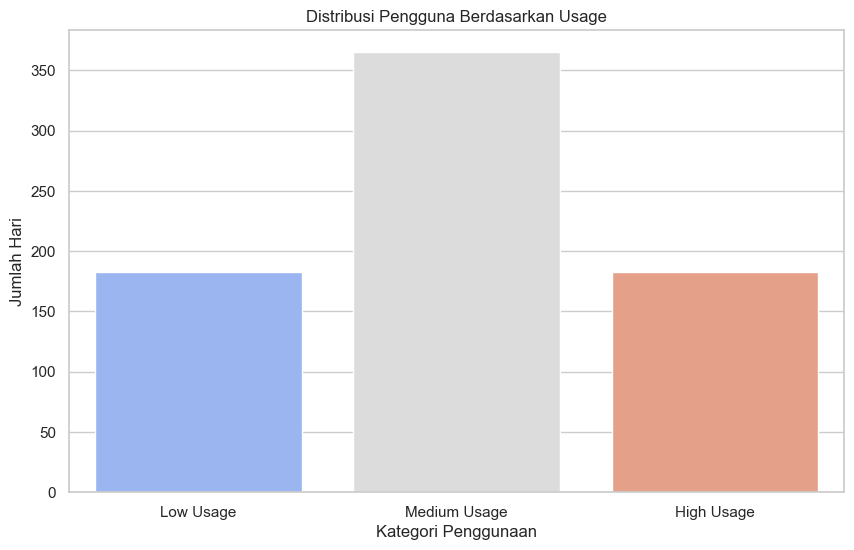

In [18]:
day_df['total_rentals'] = day_df['casual'] + day_df['registered']

average_rentals = day_df['total_rentals'].mean()
high_threshold = day_df['total_rentals'].quantile(0.75)
low_threshold = day_df['total_rentals'].quantile(0.25)

def usage_category(rentals):
    if rentals >= high_threshold:
        return 'High Usage'
    elif rentals <= low_threshold:
        return 'Low Usage'
    else:
        return 'Medium Usage'

day_df['usage_category'] = day_df['total_rentals'].apply(usage_category)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=day_df, x='usage_category', palette='coolwarm', order=['Low Usage', 'Medium Usage', 'High Usage'])
plt.title('Distribusi Pengguna Berdasarkan Usage')
plt.xlabel('Kategori Penggunaan')
plt.ylabel('Jumlah Hari')
plt.show()


- Sebagian besar hari peminjaman sepeda berlangsung dengan cukup stabil, nggak ada lonjakan atau penurunan yang berarti. Artinya, permintaan sepedanya lumayan konsisten hampir setiap harinya.

## Conclusion

- Selama musim panas, jumlah peminjaman sepeda mencapai puncaknya, menunjukkan bahwa cuaca yang cerah dan hangat mendorong lebih banyak orang untuk beraktivitas di luar ruangan. Sebaliknya, saat musim gugur, jumlah peminjaman menurun, kemungkinan karena suhu yang mulai mendingin dan kondisi cuaca yang kurang bersahabat.
- Hari kerja memiliki jumlah peminjaman yang lebih tinggi dibandingkan akhir pekan. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas sehari-hari, seperti pergi ke kantor atau sekolah, daripada untuk rekreasi.